In [36]:
#Importing necessary packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import logging

In [42]:
 # setup logger
log_fmt = '%(asctime)s - %(name)s - %(levelname)s - %(message)s'
logging.basicConfig(level=logging.INFO, format=log_fmt)
    
# get logger
logger = logging.getLogger(__name__)

In [43]:
# Check if interactive plot is enabled, if not enable it.

logger.info('Checking Interactive session')
    
if plt.isinteractive():
    print("Plotting is not interactive, Setting it to interactive mode ...")
    plt.interactive(True)
else:
    print("Plotting is already not interactive")

2019-01-09 14:31:21,892 - __main__ - INFO - Checking Interactive session


Plotting is not interactive, Setting it to interactive mode ...


In [13]:
plt.isinteractive()

True

In [46]:
#Read titanic datasets

logger.info('Reading the titanic datasets')

train_dataset = pd.read_csv(r"D:\Python\python-data-science\titanic\train.csv",index_col="PassengerId")
test_dataset = pd.read_csv(r"D:\Python\python-data-science\titanic\test.csv",index_col="PassengerId")

2019-01-09 14:39:32,492 - __main__ - INFO - Reading the titanic datasets


In [47]:
train_dataset.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Variable	Definition  	Key
survival:	Survival	    0 = No, 1 = Yes
pclass	:   Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
sex	    :   Sex	
Age	    :   Age in years	
sibsp	:   # of siblings / spouses aboard the Titanic	
parch	:   # of parents / children aboard the Titanic	
ticket	:   Ticket number	
fare	:   Passenger fare	
cabin	:    Cabin number	
embarked:	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

In [48]:
#Generic function to count the number of rows and columns in train and test datasets

def file_count(dataset,typ):
    rows, columns = dataset.shape
    print("There are {0} rows in {1} dataset".format(rows,typ))
    print("There are {0} columns in {1} dataset\n".format(columns,typ))

#Invoke the function by passing the dataset name and the type of file
file_count(train_dataset,"training")
file_count(test_dataset,"test")

There are 891 rows in training dataset
There are 11 columns in training dataset

There are 418 rows in test dataset
There are 10 columns in test dataset



In [49]:
#get the list of columns
type(train_dataset)

pandas.core.frame.DataFrame

In [51]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [132]:
#map 999 value for Survived column in test dataset and then concatenate training and test data
#axis = 1 --> Indicates, datasets would be combined colummn wise i.e., dataset1,dataset2
#axis = 0 --> Indicates, datasets would be combined row wise i.e., dataset1
#                                                                  dataset2

logger.info('Mapping 999 to survived column in test dataset')
logger.info('Concatenating train and test dataset')

test_dataset['Survived']=999
df_titanic_dataset= pd.concat((train_dataset,test_dataset),axis=0)

2019-01-09 15:35:08,183 - __main__ - INFO - Mapping 999 to survived column in test dataset
2019-01-09 15:35:08,198 - __main__ - INFO - Concatenating train and test dataset


In [133]:
df_titanic_dataset.shape
file_count(df_titanic_dataset,"titanic")

There are 1309 rows in titanic dataset
There are 11 columns in titanic dataset



In [129]:
df_titanic_dataset.head()

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
1,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0,A/5 21171
2,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1,PC 17599
3,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1,STON/O2. 3101282
4,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1,113803
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0,373450


In [134]:
#convert all the columns to lower case
def to_lower(dataframe):
    dataframe.columns = map(str.lower,dataframe.columns)

logger.info("Converting all the columns to lower case")
to_lower(df_titanic_dataset)

2019-01-09 15:35:16,593 - __main__ - INFO - Converting all the columns to lower case


In [131]:
#
logger.info("Getting the stats for columns")

print("There are totally {0} columns and they are \n\
        {1} \n".format(len(df_titanic_dataset.columns),df_titanic_dataset.columns))

#fetch numerical columns
df_titanic_num_dataset = df_titanic_dataset.select_dtypes(include=[np.number])
print("NUMERICAL COLUMNS :\n There are totally {0} numerical columns and they are \n\
        {1}".format(len(df_titanic_num_dataset.columns),df_titanic_num_dataset.columns))

#fetch non numerical columns
df_titanic_obj_dataset = df_titanic_dataset.select_dtypes(include=[np.object])
print("NON NUMERICAL COLUMNS :\n There are totally {0} numerical columns and they are \n\
        {1}".format(len(df_titanic_obj_dataset.columns),df_titanic_obj_dataset.columns))

2019-01-09 15:34:51,919 - __main__ - INFO - Getting the stats for columns


There are totally 11 columns and they are 
        Index(['age', 'cabin', 'embarked', 'fare', 'name', 'parch', 'pclass', 'sex',
       'sibsp', 'survived', 'ticket'],
      dtype='object') 

NUMERICAL COLUMNS :
 There are totally 6 numerical columns and they are 
        Index(['age', 'fare', 'parch', 'pclass', 'sibsp', 'survived'], dtype='object')
NON NUMERICAL COLUMNS :
 There are totally 5 numerical columns and they are 
        Index(['cabin', 'embarked', 'name', 'sex', 'ticket'], dtype='object')


In [135]:
df_titanic_dataset.select_dtypes(include=[np.object])

,cabin,embarked,name,sex,ticket
PassengerId,,,,,
1,NaN,S,"Braund, Mr. Owen Harris",male,A/5 21171
2,C85,C,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599
3,NaN,S,"Heikkinen, Miss. Laina",female,STON/O2. 3101282
4,C123,S,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803
5,NaN,S,"Allen, Mr. William Henry",male,373450
6,NaN,Q,"Moran, Mr. James",male,330877
7,E46,S,"McCarthy, Mr. Timothy J",male,17463
8,NaN,S,"Palsson, Master. Gosta Leonard",male,349909
9,NaN,S,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,347742


# Summary Statistics

In [136]:
df_titanic_dataset.describe()

,age,fare,parch,pclass,sibsp,survived
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,29.881138,33.295479,0.385027,2.294882,0.498854,319.269672
std,14.413493,51.758668,0.865560,0.837836,1.041658,465.749127
min,0.170000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,3.000000,0.000000,1.000000
75%,39.000000,31.275000,0.000000,3.000000,1.000000,999.000000
max,80.000000,512.329200,9.000000,3.000000,8.000000,999.000000


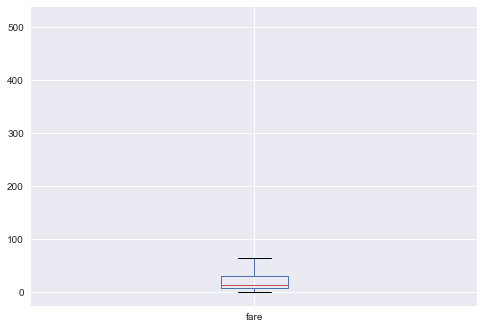

In [137]:
df_titanic_dataset.fare.plot(kind='box')

In [189]:
df_titanic_dataset['sex'] = np.where(df_titanic_dataset.sex == 'male', 1, 0)

In [145]:
df_titanic_dataset.pclass.value_counts()

3    709
1    323
2    277
Name: pclass, dtype: int64

In [149]:
# categorical column : Proprotions
df_titanic_dataset.pclass.value_counts(normalize=True)

3    0.541635
1    0.246753
2    0.211612
Name: pclass, dtype: float64

In [150]:
# categorical column : Proprotions
df_titanic_dataset.embarked.value_counts(normalize=True)

S    0.699311
C    0.206580
Q    0.094109
Name: embarked, dtype: float64

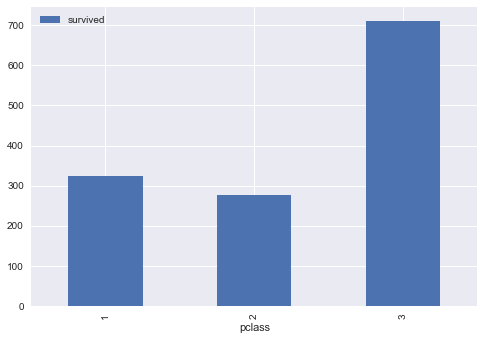

In [167]:
#plt.figure((5,5)
df_titanic_dataset[['pclass','survived']].groupby(['pclass']).count().plot(kind='bar')

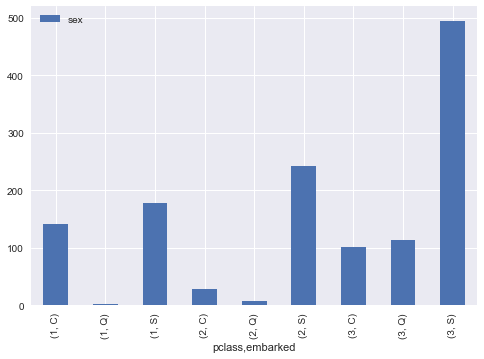

In [171]:
df.plot.scatter(x='Pclass', y='Fare', color='c', title='Scatter plot : Passenger class vs Fare', alpha=0.15);

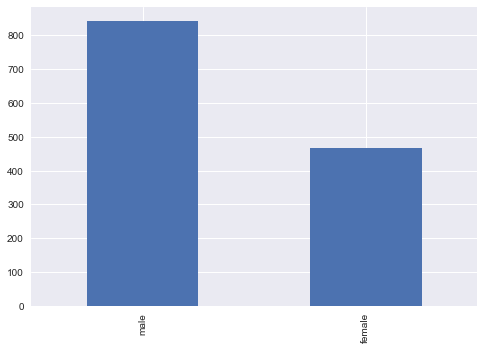

In [148]:
#There should be some numeric data to plot the graph
#For eg: df_titanic_dataset.sex.plot(kind='bar') wont work without providing value_counts

df_titanic_dataset.sex.value_counts().plot(kind='bar')

In [178]:
df_titanic_dataset.fare.max()

512.32920000000001

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FB82ADD588>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001FB82E75400>]], dtype=object)

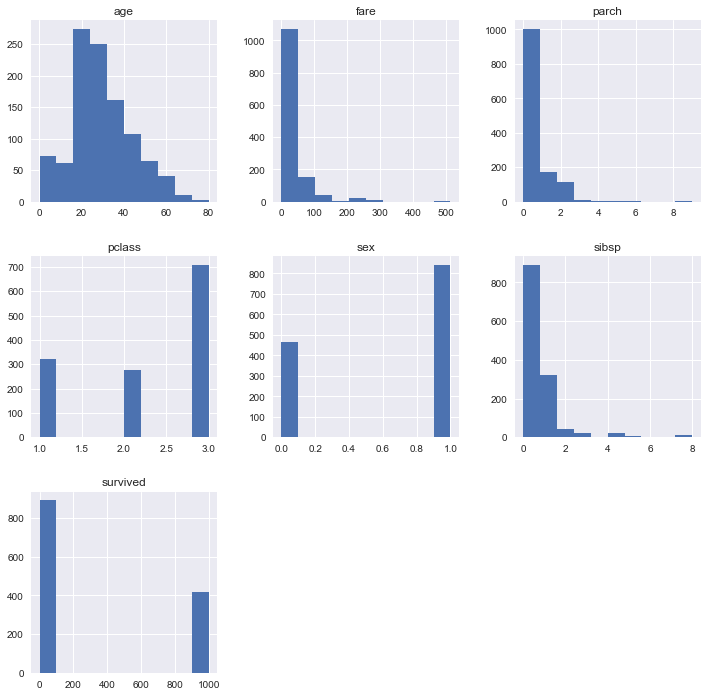

In [190]:
#These plots are generated only for numerical columns

df_titanic_dataset.hist(figsize=(12,12))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FB8545C8D0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001FB857E2C88>]], dtype=object)

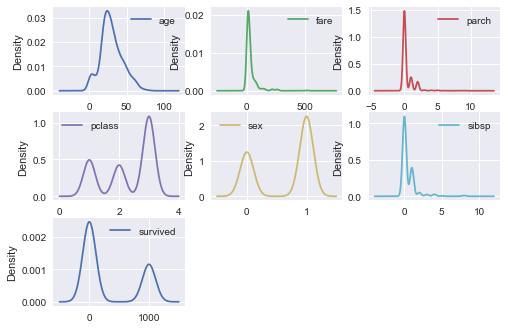

In [203]:
#These plots are generated only for numerical columns

df_titanic_dataset.plot(kind='kde', subplots=True, layout=(3,3), sharex=False)

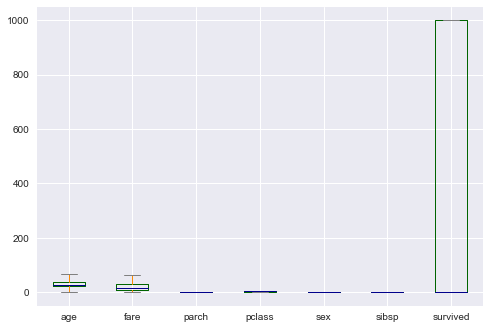

In [202]:
#These plots are generated only for numerical columns

#df_titanic_dataset.plot(kind='box', subplots=True, layout=(3,3), sharex=False)

color = dict(boxes='DarkGreen', whiskers='DarkOrange', medians='DarkBlue', caps='Gray')
df_titanic_dataset.plot.box(color=color, sym='r+')

In [206]:
#df.groupby('Sex').Age.median()

df_titanic_dataset.groupby('sex').age.median()

sex
0    27.0
1    28.0
Name: age, dtype: float64

In [210]:
#Median fare and age by class
df_titanic_dataset.groupby('pclass')['fare','age'].median()

,fare,age
pclass,,
1,60.0000,39.0
2,15.0458,29.0
3,8.0500,24.0


In [213]:
#Max fare and age by class
df_titanic_dataset.groupby('pclass')['fare','age'].max()

,fare,age
pclass,,
1,512.3292,80.0
2,73.5000,70.0
3,69.5500,74.0


In [216]:
# more complicated aggregations 
aggregations = {
    'fare': { # work on the "Fare" column
        'mean_Fare': 'mean',  # get the mean fare
        'median_Fare': 'median', # get median fare
        'max_Fare': max,
        'min_Fare': min
    },
    'age': {     # work on the "Age" column
        'median_Age': 'median',   # Find the max, call the result "max_date"
        'min_Age': min,
        'max_Age': max,
        'range_Age': lambda x: max(x) - min(x)  # Calculate the age range per group
    }
}


df_titanic_dataset.groupby(['pclass']).agg(aggregations)

C:\Program Files\Anaconda3\lib\site-packages\pandas\core\groupby.py:3961: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


fare                                       age                  \
        mean_Fare median_Fare  max_Fare min_Fare median_Age min_Age max_Age   
pclass                                                                        
1       87.508992     60.0000  512.3292      0.0       39.0    0.92    80.0   
2       21.179196     15.0458   73.5000      0.0       29.0    0.67    70.0   
3       13.302889      8.0500   69.5500      0.0       24.0    0.17    74.0   

                  
       range_Age  
pclass            
1          79.08  
2          69.33  
3          73.83

In [234]:
pd.crosstab(df_titanic_dataset.sex,df_titanic_dataset.pclass)

pclass,1,2,3
sex,,,
0,144,106,216
1,179,171,493


In [237]:
pd.crosstab(df_titanic_dataset.sex, df_titanic_dataset.pclass,margins=True, aggfunc=[np.median], values=df_titanic_dataset.fare)

median                           
pclass         1        2        3      All
sex                                        
0       80.92915  23.0000  10.4896  23.0000
1       49.50420  13.0000   7.8958  11.8875
All     60.00000  15.0458   8.0500  14.4542

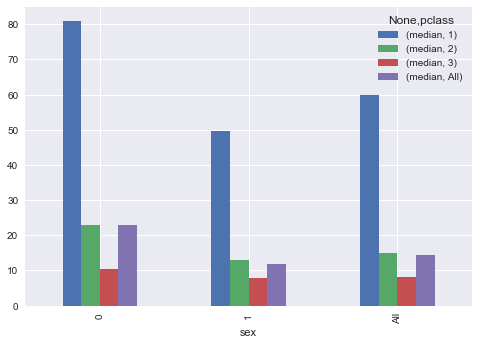

In [236]:
#Fill the cross tab with median values for the cross tab, margin parameter will give overall

pd.crosstab(df_titanic_dataset.sex, df_titanic_dataset.pclass,margins=True, aggfunc=[np.median], values=df_titanic_dataset.fare).plot(kind='bar')

# Data Munging

In [287]:
# use .info() to detect missing values (if any)
df_titanic_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
age         1046 non-null float64
cabin       295 non-null object
embarked    1309 non-null object
fare        1308 non-null float64
name        1309 non-null object
parch       1309 non-null int64
pclass      1309 non-null int64
sex         1309 non-null int32
sibsp       1309 non-null int64
survived    1309 non-null int64
ticket      1309 non-null object
dtypes: float64(2), int32(1), int64(4), object(4)
memory usage: 157.6+ KB


In [240]:
df_titanic_dataset[df_titanic_dataset.embarked.isnull()]

,age,cabin,embarked,fare,name,parch,pclass,sex,sibsp,survived,ticket
PassengerId,,,,,,,,,,,
62,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,1,0,0,1,113572
830,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,1,0,0,1,113572


There are two options to fill the missing values for embarked feature <br>
Option1 : Based on the Survival, since these two passengers survived - checking the maximum number of passengers who survived agaiant the embarkment point.

Option2 : Based on the fare, comparing the fare of these people against the median value of fare paid against each embarkment.

Either of these can be used!

In [245]:
df_titanic_dataset.embarked.value_counts()

S    914
C    270
Q    123
Name: embarked, dtype: int64

In [278]:
#Combination of groupby and where clause (condition)

df_titanic_dataset.query("survived != 999").groupby(['survived','embarked'])['survived'].count()

survived  embarked
0         C            75
          Q            47
          S           427
1         C            93
          Q            30
          S           217
Name: survived, dtype: int64

In [282]:
# which embarked point has higher survival count
pd.crosstab(df_titanic_dataset[df_titanic_dataset.survived != 999].survived, df_titanic_dataset[df_titanic_dataset.survived != 999].embarked)

embarked,C,Q,S
survived,,,
0,75,47,427
1,93,30,217


As per Option 1 - 'S' would be the embarked value for the two missing entries.

In [283]:
df_titanic_dataset.groupby(['pclass', 'embarked']).fare.median()

pclass  embarked
1       C           76.7292
        Q           90.0000
        S           52.0000
2       C           15.3146
        Q           12.3500
        S           15.3750
3       C            7.8958
        Q            7.7500
        S            8.0500
Name: fare, dtype: float64

As per Option2 'C' is the embarked value for the missing entries as for class 1 the median fare is close to 76 for C.

In [285]:
# replace the missing values with 'C'
df_titanic_dataset.embarked.fillna('C', inplace=True)

In [292]:
df_titanic_dataset[df_titanic_dataset.fare.isnull()]

#df_titanic_dataset[df_titanic_dataset.ticket==3701]

,age,cabin,embarked,fare,name,parch,pclass,sex,sibsp,survived,ticket
PassengerId,,,,,,,,,,,
1044,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,3,1,0,999,3701


In [295]:
median_fare = df_titanic_dataset.loc[(df_titanic_dataset.pclass == 3) & (df_titanic_dataset.embarked == 'S'),'fare'].median()
print(median_fare)

8.05


In [296]:
df_titanic_dataset.embarked.fillna(median_fare, inplace=True)